<a href="https://colab.research.google.com/github/AmberLee2427/minicourses/blob/main/chapter5/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
body, h1, h2, h3, h4, h5, h6, p, div, span {
    font-family: "Helvetica Neue", Helvetica, Arial, sans-serif !important;
}
</style>

# <font face="Helvetica" size="6"> Chapter 5: Mini Data Challenge </font>


<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

<i> Authors: Amber Malpas, Katarzyna Kruszyńska, Somayeh Khakpash, Ali Crisp </i>

<br>

If you would like an introduction to python notebooks, please read this tutorial: https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46

## Dev Notes
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

### Overview

The current plan is to give the students a miniature "season" of data to fit (as in a couple hundred lightcurves), and an example of how to fit a whole season in a notebook. This example will be using pyLiMA for the model fitting. If we are using Mulens Model we will probably just have to pretend that the observatory is on Earth.

The data will be the same set that the C4 data come from.

The notebook should probably include a pyLiMASS example.

### Links to Content

https://lsu.app.box.com/s/qx440yp9ekzrhaevtfu7ksnfgh2jhc29

https://drive.google.com/drive/folders/1jNKztBVCQHZTs5iPVJDFTy1btLGn15s3?usp=drive_link

We need a single lens set. I might have to generate it. Or ask Ali to.

### Ideas

* Mass measurement?
* Astrometric microlensing?
* False positives in the data?
* Demographics?

### Note

> I'm staring by just doing a bunch of coding examples. I'll remove pieces and turn them in to exercises after.

> ### Rough Plan
>
>**Chapter 5: Mini Data Challenge – Bulk Microlensing Analysis**
>
> 1. **Introduction**  
>    - Briefly explain the motivation for bulk data analysis in the Roman era: processing hundreds or thousands of events without manually tweaking each one.  
>    - Emphasize that while Chapter 4 focused on hands-on analysis for individual events, Chapter 5 is about scaling up—addressing the pitfalls and nuances encountered when working with large datasets.
>
> 2. **Single Event Fit**
>    - Recap of Chapter 4
>    -  **Special Topics** (Optional Sections):
>      - **Astrometry:**  
>        Outline how astrometric microlensing can provide additional constraints, noting that this is an extra module for those interested.  
>      - **Mass Estimates:**  
>        Provide a brief discussion (and possibly code snippets) on deriving mass estimates from parallax and finite source effects, with the understanding that full implementation is an advanced topic.
>
> 3. **Small subset**
>    - Set up the framework for fitting the entire season as an exercise.   
>    - Test in out on a small subset of the data
>    - **Parallelization for Computational Efficiency**  
>      - Describe the challenges of running heavy computations in a Jupyter Notebook, especially the "frozen function" issue when parallelizing.  
>      - Demonstrate a small-scale example of in-notebook parallelization on the same small subset
>      - Explain that kernel restarts may be necessary when modifying functions.
>
>    - **Future Directions and Advanced Topics**  
>      - Briefly outline how an automated anomaly detection method (e.g., using a windowed reduced chi-squared metric) could help flag problematic events for further analysis.  
>      - Provide links or references (e.g., RTModel documentation) for students who want to delve deeper into automation.
>
> 4. **Full Season**
>    - Fit a mini season's worth of microlensing events
>    - **Initial Fitting and Residual Inspection**
>      - **Parameter Degeneracies, Priors and Bounds:**  (This should be mostly covered in Chapter 4)
>
>        Discuss the degeneracies (e.g., u_0, t_E vs. F_B) and how to set sensible priors (e.g. log rho) or bounds(e.g. u_0>0).
>      - **Inintial Parameter Estimates**
>        Run a mini-season-wide basic fit (using a basic PSPL fit) on all events. This model is covered in Chapter 4, we are just smashing through it to get our parameter estimates for a higher order fit.
>      - Explain how deviations in the residuals can indicate the need for a more complex (binary) model.  
>    - **False Positives**
>      - **Manual Inspection:**  
>        Show a subset of around 10 lightcurves for detailed manual inspection.
>      - Somayeh: include a discussion on false positives and how to recognize them and, ideally, include them in the dataset.
>    - **Higher Order Effects**
>      - turn on the higher order effects needed for mass estimates and let it go.
>
>    - **Mass**
>      Leave this as a homework exercise
>
> 5. **Advanced Fitting Techniques for Complex Events**  (Move this to Chpater 4 and leave it as information, not an exercise)
>    - **Robust Sampling Methods:**  
>      Introduce why gradient descent methods fail for binary events, and present **emcee** (or another MCMC sampler) as a better alternative for exploring spastic likelihood spaces.  
>    - **Priors**  
>    - **Binary-Lens Degeneracies:**  
     Mention that a broad grid search is often employed to explore the parameter space thoroughly, though we won’t implement this in full here.


## 1. Introduction

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Welcome to **Chapter 5: Mini Data Challenge – Bulk Microlensing Analysis**. In this chapter, we’re moving from detailed, one-on-one analysis of individual events (which you mastered in Chapter 4) to handling large-scale data sets—a challenge that’s both exciting and essential in today’s data-rich environment.

### Why Are We Doing This?

With the upcoming Roman Space Telescope, you’re going to encounter hundreds or even thousands of microlensing events. Manually tuning each one just isn’t practical. Instead, we need a streamlined approach that lets us quickly process bulk data while still catching those subtle details. Here’s the game plan:
- **Bulk Fitting:** Start with simple models (like PSPL or FSPL) to establish a baseline across all events.
- **Residual Inspection:** Learn to recognize when a basic model isn’t enough—those deviations in the data are your hints that something more complex, like a binary event, might be occurring.
- **Efficiency Matters:** Discover how to use parallelization and smart coding strategies to keep the workflow efficient, even when the data volume is huge.
- **Advanced Modeling:** When the basics don’t quite cut it, we’ll introduce more robust methods (like MCMC sampling) to help you tackle those tricky, irregular cases.

### What’s in It for You?

In this chapter, you’ll:
- Learn to run a season-wide baseline fit—a useful skill for any large-scale analysis.
- Develop your skills in visually inspecting light curves to pinpoint events that may need more sophisticated modeling.
- Practice estimating key parameters for binary events using real data, guided by hands-on materials and worksheets.
- Understand the limitations of simpler fitting methods and see how advanced tools like **emcee** can help you explore complex likelihood spaces.
- Gain insights into setting appropriate priors and boundaries to manage parameter degeneracies effectively.
- Get a taste of parallelization in a Jupyter Notebook, and see why it’s crucial for handling large datasets.
- Explore optional topics like astrometric microlensing and mass estimates for those who want to dig deeper.
- Finally, be introduced to a full-season fitting exercise—a challenging, extra-credit task designed for those ready to push their analysis further.

Our aim is to provide you with a realistic view of what working with bulk microlensing data involves. This chapter is designed to help you build confidence in managing large datasets while also preparing you for the more complex tasks you'll encounter in your future research.

Let’s dive in and get ready to tackle the challenges ahead—step by step, and with plenty of support along the way.

>  [x] Where are we going to get the data from? WG7?
>>> Old data challenge data
>
>  [x] Where are we hosting this?
>>> Static notebooks in the same place as the slides and links to colab.
>
>  [x] yaml/ install instruction, if we aren't on Colab
>>> W are staying in Colab. Install inline.
>
>  [ ] css integration, if we aren't on Colab
>>> It works for the static notebook so this could still be worth while.



## 2. Racap of the Single-Lens Fit

<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">


In [ ]:
#@title Imports and Setup

# system tools
import os
import sys
from io import StringIO
import time
from typing import Tuple, Callable, Optional, List
import shutil

# data analysis tools
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
from scipy.optimize import minimize

# web scrapping tools
import bs4 as bs
import urllib
import urllib.request
import pandas as pd

# parallel processing tools
!pip install pathos
from pathos.multiprocessing import ProcessingPool as Pool  # for multiprocessing inside jupyter
import multiprocessing as mp  # Ensure this is imported

# microlensing tool
!pip install MulensModel
import MulensModel

### 2.1 Mulens Model Package Fix

Follow the instruction in this section **if** you haven't already got a working version of Mulens Model. You can check if your version is working by making the plot in [Section 2.2](#section-22).

In [ ]:
#@title Removing the 'data' file inside `mulensmodel_dir`

mulensmodel_dir = os.path.dirname(MulensModel.__file__)
data_file_path = os.path.join(mulensmodel_dir, 'data')

if os.path.exists(data_file_path):
  if os.path.isfile(data_file_path):
    os.remove(data_file_path)
  else:
    shutil.rmtree(data_file_path)
  print(f"Removed 'data' file or directory from {mulensmodel_dir}")
else:
  print(f"No 'data' file or directory found in {mulensmodel_dir}")

Removed 'data' file or directory from /usr/local/lib/python3.11/dist-packages/MulensModel


In [ ]:
#@title Replace this path with the path printed above, if they are different
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

AdaptiveContouring.cpython-311-x86_64-linux-gnu.so  magnificationcurve.py
b0b1utils.py					    modelparameters.py
binarylensimports.py				    model.py
binarylens.py					    mulensdata.py
binarylenswithshear.py				    mulensobjects
causticsbinary.py				    orbits
causticsbinarywithshear.py			    pointlens.py
causticspointwithshear.py			    pointlenswithshear.py
coordinates.py					    __pycache__
data						    satelliteskycoord.py
elliputils.py					    tests
event.py					    trajectory.py
fitdata.py					    uniformcausticsampling.py
horizons.py					    utils.py
__init__.py					    VBBL.cpython-311-x86_64-linux-gnu.so
limbdarkeningcoeffs.py				    version.py


In [ ]:
#@title Clone the MulensModel directory from git
!git clone https://github.com/rpoleski/MulensModel.git


fatal: destination path 'MulensModel' already exists and is not an empty directory.


In [ ]:
#@title Copy the data folder to the package location

print('Cuurent Working Directory:')
!ls

print('\nMulensModel Directory:')
!ls MulensModel

# copy the data folder to the package location
# you may need to change these file paths, depending on where you run this notebook
!cp -r ./MulensModel/data /usr/local/lib/python3.11/dist-packages/MulensModel

print('\nMulensModel Package Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel

print('\ndata Directory:')
!ls /usr/local/lib/python3.11/dist-packages/MulensModel/data

Cuurent Working Directory:
MulensModel  sample_data

MulensModel Directory:
AUTHORS.md	 data		      documents  MANIFEST.in	 requirements.txt
CITATION.cff	 developers_board.md  examples	 pyproject.toml  setup.py
CONTRIBUTING.md  docs		      LICENSE	 README.md	 source

MulensModel Package Directory:
AdaptiveContouring.cpython-311-x86_64-linux-gnu.so  magnificationcurve.py
b0b1utils.py					    modelparameters.py
binarylensimports.py				    model.py
binarylens.py					    mulensdata.py
binarylenswithshear.py				    mulensobjects
causticsbinary.py				    orbits
causticsbinarywithshear.py			    pointlens.py
causticspointwithshear.py			    pointlenswithshear.py
coordinates.py					    __pycache__
data						    satelliteskycoord.py
elliputils.py					    tests
event.py					    trajectory.py
fitdata.py					    uniformcausticsampling.py
horizons.py					    utils.py
__init__.py					    VBBL.cpython-311-x86_64-linux-gnu.so
limbdarkeningcoeffs.py				    version.py

data Directory:
ephemeris_files			  

### 2.2 Single-Lens Fitting with Mulens Model <a id="section-22"></a>


In [ ]:
#@title Available finite source methods

finite_source_methods = [
    # Uniform source
    'finite_source_uniform_Gould94',               # 0, 10E-3 < rho < 1 (has a bug)
    'finite_source_uniform_Gould94_direct',        # 1, 10E-3 < rho < 1
    'finite_source_uniform_WittMao94',             # 2, rho < 0.01
    'finite_source_uniform_Lee09',                 # 3, rho > 0.01

    # Limb-darkened source
    'finite_source_LD_WittMao94',                  # 4, rho < 0.01
    'finite_source_LD_Yoo04',                      # 5, 10E-3 < rho < 1
    'finite_source_LD_Yoo04_direct',               # 6, 10E-3 < rho < 1
    'finite_source_LD_Lee09'                       # 7, rho > 0.01
]

Let's take a look at how different higher-order effects change the magnification model.  

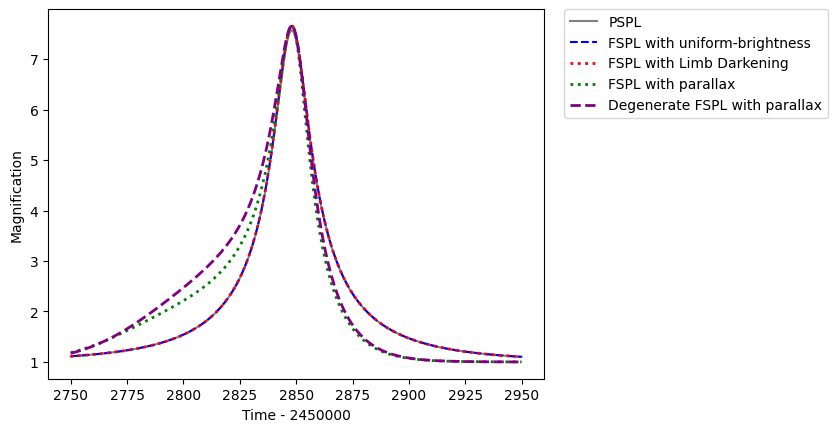

In [ ]:
#@title Plotting the magnification models

# plot bounds
t_min = 2452750
t_max = 2452950
t_range = [t_min, t_max]

# Model parameters
t_0 =  2452848.06
u_0 = 0.133
t_E = 61.5
log_rho = -1.4 #@param {type:"slider", min:-3, max:0, step:0.1}
rho = 10**log_rho
pi_E_E = 3.2 #@param {"type":"slider","min":-5,"max":5,"step":0.1}
pi_E_N = 1.7 #@param {type:"slider", min:-5, max:5, step:0.1}
t_0_par = 2452848.06 # should not change during modelling and needs to be close to t_0

# Define a point source, point lens model
pspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

# Define a finite source, point lens model
fspl = MulensModel.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 'rho': rho})

# Define a parallax model
fspl_pllx = MulensModel.Model({'t_0': t_0,
                          'u_0': u_0,
                          't_E': t_E,
                          'rho': rho,
                          'pi_E_E': pi_E_E,
                          'pi_E_N': pi_E_N,
                          't_0_par': t_0_par
                          },
                         ra='18:04:45.71',
                         dec='-26:59:15.2'
                         )

# Define a LOM model?

# Plot the magnification curve:
plt.close(0)
plt.figure(0)
pspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='grey',
    linestyle='-',
    label='PSPL'
    )

# calculate the magnification curve using a finite source model
fspl.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='blue',
    linestyle='--',
    label='FSPL with uniform-brightness'
    )

# calculate the magnification curve using a finite source model with limb darkening
fspl.set_magnification_methods([2450000., finite_source_methods[5], 2470000.])  # rho = 0.1
fspl.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='red',
    linestyle=':',
    linewidth=2,
    label='FSPL with Limb Darkening'
    )

# calculate the magnification curve using a finite source model and parallax
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[1], 2470000.])  # rho = 0.1
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='green',
    linestyle=':',
    linewidth=2,
    label='FSPL with parallax'
    )


# calculate the degenerate finite-source, parallax solution
fspl_pllx.set_magnification_methods([2450000., finite_source_methods[3], 2470000.])
parameters = ["t_0", "u_0", "t_E", "rho", "pi_E_E", "pi_E_N", "t_0_par"]
setattr(fspl_pllx.parameters, "u_0", -u_0)  # multiply u0 by -1 to get the degenerate solution
fspl_pllx.plot_magnification(
    t_range=t_range,
    subtract_2450000=True,
    color='purple',
    linestyle='--',
    linewidth=2,
    label='Degenerate FSPL with parallax'
    )

plt.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

If your version of Mulens model is working, this figure should have rendered without an error.

> There are a few things to take away from this plot:
> * the finite source effect has a big affect on the shape of the magnification curve
> * the surface brightness model (e.g., uniform) for the source has much less of an affect
> * the degenerate parallax solutions may be noticably different with sufficiently large parallax
> * parallax does not need to be as big, for the affect to noticably change the magnification curve, compared with a static model.

Try playing with the parallax (`"pi_E_N"`, `"pi_E_E"`) and finite source (`"rho"`)parameters and see how they  change your magnification model.

## 3. OGLE EWS Bulk Lightcurve Fit
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

The Roman style data have many epoch which make the evaluation of a magnification model take a long time. Ground -based data, on the other hand have much fewer epochs and algorithms such as OGLEs EWS which estimate fit parameters for us. We are going to design our bulk fit on these much more tractible data and then apply it to a simulated Roman season later.

Let's start this process by scraping for some lightcurves and microlensing model parameter estimates.

In [ ]:
#@title Web scrapping functions

def get_data_url(event: str) -> str:
    '''Takes an event name and returns the URL for the data page.'''

    event = event.split('-') # split the event name into its components, seperated by '-'
    year = event[0]  # the first component is the year
    region = event[1].lower()  # the second component is region (e.g., blg or gd), which we need to make lower case.
    number = event[2]  #
    url = f'https://www.astrouw.edu.pl/ogle/ogle4/ews/{year}/{region}-{number}/phot.dat'

    return url

def fetch_event_data(url: str) -> pd.DataFrame:
    '''Takes a url and returns the data as a pandas dataframe.'''

    # Read the data from the URL
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')

    # Convert the data to a pandas DataFrame
    df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])

    return df

# Test
event = '2017-BLG-0001'
event_data_url = get_data_url(event)
data = fetch_event_data(event_data_url)
print(data)

               HJD  I magnitude  magnitude error  seeing  sky level
0     2.457060e+06       17.644            0.034    7.59     1155.0
1     2.457061e+06       17.665            0.027    6.44      945.0
2     2.457061e+06       17.652            0.025    4.90     1305.0
3     2.457062e+06       17.682            0.024    5.85      934.0
4     2.457062e+06       17.702            0.023    5.10     1085.0
...            ...          ...              ...     ...        ...
2657  2.458047e+06       17.666            0.031    7.25      996.0
2658  2.458049e+06       17.661            0.018    4.33      703.0
2659  2.458049e+06       17.682            0.017    4.14      844.0
2660  2.458054e+06       17.672            0.035    6.18     1496.0
2661  2.458054e+06       17.686            0.041    7.01     1568.0

[2662 rows x 5 columns]


<ipython-input-10-0a5d4f6b0d79>:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])


Great. Now that we have functions to fetch lightcurves from the OGLE EWS website, we can just grab those when we need them. But we also need some good parameter estimates if we don't want our fits to take eternity to run, or potentially fail to find the likelihood maximum. Estimating these parameters are part of the EWS process, so we can shamlessly steal from those for this exercise.

In [ ]:
#@title More web scraping (this time for the EWS table)

def fetch_table_data(url):
    '''Takes a URL and returns the first table as a pandas DataFrame.'''
    source = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(source, 'lxml')
    table = soup.find_all('table')
    df = pd.read_html(str(table))[0]

    return df

ews_url = "https://ogle.astrouw.edu.pl/ogle4/ews/ews.html"
ews_df = fetch_table_data(ews_url)
print(ews_df)

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
342         NaN  2025-BLG-0334  BLG662.08    22101  17:32:55.57  -30:35:12.0   
343         NaN  2025-BLG-0335  BLG675.10   100948  17:42:08.35  -27:27:27.8   
344         NaN  2025-BLG-0336  BLG782.07     3092  18:16:55.55  -18:40:46.7   
345         NaN  2025-BLG-0337  BLG906.30    14548  17:09:51.95  -29:53:53.0   
346         NaN  2025-BLG-0338  BLG921.04    97981  17:24:40.97  -27:49:18.3   

      Tmax (HJD)      Tmax (UT)      ta

<ipython-input-11-a36d45dce4f6>:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Let's just loop through all the events and add the data URLs to the pandas dataframe, for convenience.

In [ ]:
#@title Adding a URL column to the data frame

# Add a new column to the EWS data frame ('ews_df'), using the column name 'event data url'.
ews_df['event data url'] = ews_df['Event'].apply(get_data_url)
print(ews_df)
print(min(ews_df['Tmax (HJD)']), max(ews_df['Tmax (HJD)']))
print(min(ews_df['Umin']), max(ews_df['Umin']))
print(min(ews_df['tau']), max(ews_df['tau']))

     Unnamed: 0          Event      Field  Star No   RA (J2000)  Dec (J2000)  \
0           NaN  2025-BLG-0001  BLG497.22    26223  17:19:44.68  -27:43:21.4   
1           NaN  2025-BLG-0002  BLG498.16    23293  17:17:24.61  -29:19:44.8   
2           NaN  2025-BLG-0003  BLG498.24   149001  17:18:03.34  -28:50:21.4   
3           NaN  2025-BLG-0004  BLG498.29     2940  17:20:03.15  -28:41:15.5   
4           NaN  2025-BLG-0005  BLG499.29    47835  17:19:54.58  -29:57:28.0   
..          ...            ...        ...      ...          ...          ...   
342         NaN  2025-BLG-0334  BLG662.08    22101  17:32:55.57  -30:35:12.0   
343         NaN  2025-BLG-0335  BLG675.10   100948  17:42:08.35  -27:27:27.8   
344         NaN  2025-BLG-0336  BLG782.07     3092  18:16:55.55  -18:40:46.7   
345         NaN  2025-BLG-0337  BLG906.30    14548  17:09:51.95  -29:53:53.0   
346         NaN  2025-BLG-0338  BLG921.04    97981  17:24:40.97  -27:49:18.3   

      Tmax (HJD)      Tmax (UT)      ta

Nice! Now we have some data to test with and some web scraping skills under our belt. We should quickly test this with a single lightcurve, plotting the model from the OGLE EWS table.

2025-BLG-0001
Index(['Unnamed: 0', 'Event', 'Field', 'Star No', 'RA (J2000)', 'Dec (J2000)',
       'Tmax (HJD)', 'Tmax (UT)', 'tau', 'Umin', 'Amax', 'Dmag', 'fbl', 'Ibl',
       'I0', 'event data url'],
      dtype='object')


<ipython-input-39-ecdee64e96a3>:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
/usr/local/lib/python3.11/dist-packages/MulensModel/fitdata.py:63: UserWarning: Dataset bandpass is I but model does not have a limb-darkening coefficient for I. Assuming zero.
  warnings.warn(msg.format(self.dataset.bandpass))


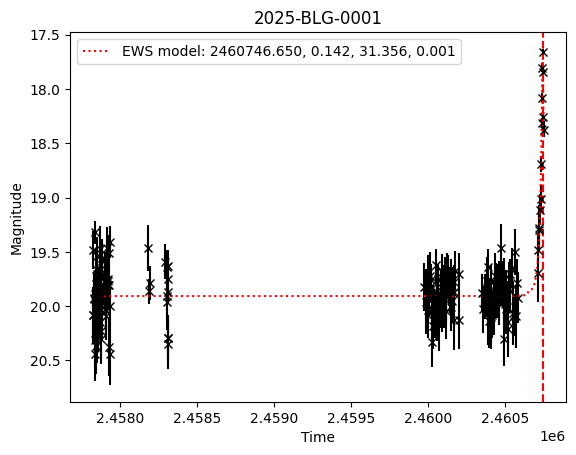

In [ ]:
#@title Plotting the '2025-BLG-0001' event with the EWS model


# [ ] add aprallax to the model.
# [ ] edit to include the other ews parameters
# [ ]


# Function to process a single event
def plot_event_data(i, ews_df):
    event = ews_df['Event'][i]
    print(event)
    print(ews_df.columns)
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)
    t_0_0 = ews_df['Tmax (HJD)'][i]
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess


    plt.close(i+1)
    plt.figure(i+1)

    plt.errorbar(data['HJD'],
                  data['I magnitude'],
                  yerr=data['magnitude error'],
                  fmt='x',
                  color='black'
                  )
    plt.axvline(ews_df['Tmax (HJD)'][i], color='red', linestyle='--')

    plt.title(event)
    plt.xlabel('HJD')
    plt.ylabel('I magnitude')

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})
    fspl_model.set_magnification_methods([t_0_0 - 3.0 * t_E_0,
                                          'finite_source_uniform_Gould94',
                                          t_0_0 + 3.0 * t_E_0
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]

    # Plot the initial model
    event_object.plot_model(color='r',
                            linestyle=':',
                            t_range=[min(data['HJD']),
                                     max(data['HJD'])
                                    ],
                            label='EWS model: %1.3f, %1.3f, %1.3f, %1.3f' %(t_0_0, u_0_0, t_E_0, rho_0)
                            )

    plt.legend()
    plt.savefig(f'./{event}.png', bbox_inches='tight')
    plt.show()

plot_event_data(0, ews_df)


Is it working? If it is, we can move on and test out our fitting algorithms. Firslty, We will need an objective functions to measure how well our model fits the data (or, if we are speaking with more statistical precision, the model that is most likely to have generated our data, given gaussian noise).

In [ ]:
def chi2_fun(theta, parameters_to_fit, event):
    """
    Calculate chi2 for given values of parameters.

    Parameters
    ----------
    theta : np.ndarray
        Vector of parameter values, e.g., `np.array([5380., 0.5, 20.])`.
    parameters_to_fit : list of str
        List of names of parameters corresponding to theta, e.g., `['t_0', 'u_0', 't_E']`.
    event : MulensModel.Event
        Event which has datasets for which chi2 will be calculated.

    Returns
    -------
    chi2 : float
        Chi2 value for given model parameters.

    Notes
    -----
    Function from MulensModel documentation:
    https://github.com/rpoleski/MulensModel/blob/master/examples/example_02_fitting.py
    """
    # First we have to change the values of parameters in
    # event.model.parameters to values given by theta.
    for (parameter, value) in zip(parameters_to_fit, theta):
        setattr(event.model.parameters, parameter, value)

    # After that, calculating chi2 is trivial:
    return event.get_chi2()

<ipython-input-105-5f1849faab71>:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
/usr/local/lib/python3.11/dist-packages/MulensModel/fitdata.py:63: UserWarning: Dataset bandpass is I but model does not have a limb-darkening coefficient for I. Assuming zero.
  warnings.warn(msg.format(self.dataset.bandpass))


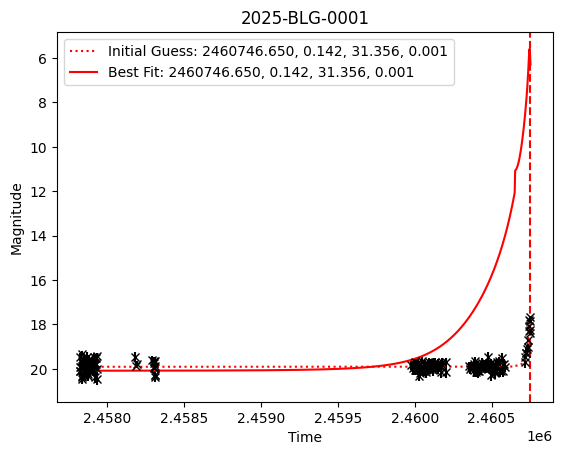

Time taken to fit the first 2: 1.6371612548828125 seconds
Estimated season completion time: 17:19:41


<ipython-input-105-5f1849faab71>:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None, names=['HJD', 'I magnitude', 'magnitude error', 'seeing', 'sky level'])
/usr/local/lib/python3.11/dist-packages/MulensModel/fitdata.py:63: UserWarning: Dataset bandpass is I but model does not have a limb-darkening coefficient for I. Assuming zero.
  warnings.warn(msg.format(self.dataset.bandpass))


In [ ]:
# this function is for if we need emcee
def mulens_neglogP_function(theta, parameters_to_fit, event):
    ''' negative log prob function for MulensModel fitting'''

    # Priors
    if (theta[0] < (2460281.208-100)) or (theta[0] > (2461373.155 + 100)):  # t_0
        return np.inf
    elif (theta[1] < 0.000001) or (theta[1] > 2.0):  # u_0
        return np.inf
    elif (theta[2] < 0.1) or (theta[2] > 700):  # t_E
        return np.inf
    elif theta[3] < 0 or theta[3] > 0.2:  # rho
        return np.inf
    else:
        for (parameter, value) in zip(parameters_to_fit, theta):
            setattr(event.model.parameters, parameter, value)

        dataset = event.datasets[0]
        (FS, FB) = event.get_flux_for_dataset(dataset)
        if FS <= 0 or FB < -100 or (FS + FB) <= 0: # alow some negative blending
            return np.inf
        else:
            return event.get_chi2()  # negative log prob (technically it should be half this)

# Function to process a single event
def process_event(i, ews_df, n, start_time):
    event = ews_df['Event'][i]
    url = ews_df['event data url'][i]
    data = fetch_event_data(url)
    t_0_0 = ews_df['Tmax (HJD)'][i]
    u_0_0 = ews_df['Umin'][i] * 1.1  # initial guess
    t_E_0 = ews_df['tau'][i] * 1.1  # initial guess
    rho_0 = 0.001  # initial guess

    if i % n == 0:
        plt.close(i)
        plt.figure(i)

        plt.errorbar(data['HJD'],
                     data['I magnitude'],
                     yerr=data['magnitude error'],
                     fmt='x',
                     color='black'
                     )
        plt.axvline(ews_df['Tmax (HJD)'][i], color='red', linestyle='--')

        plt.title(event)
        plt.xlabel('HJD')
        plt.ylabel('I magnitude')

    ######################
    # Your code here

    # Data as a list of numpy arrays
    data_list = [data['HJD'].to_numpy(), data['I magnitude'].to_numpy(), data['magnitude error'].to_numpy()]

    # Pack everything into MulensModel objects
    data_object = MulensModel.MulensData(data_list=data_list,
                                plot_properties={'color': 'thistle',
                                                 'label': 'OGLE',
                                                 'marker': 'x',
                                                 'markersize': 2
                                                 },
                                phot_fmt='mag',
                                bandpass='I'
                                )
    fspl_model = MulensModel.Model({'t_0': t_0_0, 'u_0': u_0_0, 't_E': t_E_0, 'rho': rho_0})
    fspl_model.set_magnification_methods([t_0_0 - 3.0 * t_E_0,
                                          'finite_source_uniform_Gould94',
                                          t_0_0 + 3.0 * t_E_0
                                          ],
                                          source=None
                                          )  # rho <= 0.1
    event_object = MulensModel.Event(datasets=data_object, model=fspl_model)

    parameters_to_fit = ["t_0", "u_0", "t_E", "rho"]

    # Plot the initial model
    if i % n == 0:
        event_object.plot_model(color='r',
                                linestyle=':',
                                t_range=[min(data['HJD']),
                                         max(data['HJD'])
                                         ],
                                label='Initial Guess: %1.3f, %1.3f, %1.3f, %1.3f' %(t_0_0, u_0_0, t_E_0, rho_0)
                                )

    # Fit using scipy Nelder-Mead
    result = minimize(mulens_neglogP_function, [t_0_0, u_0_0, t_E_0, rho_0], args=(parameters_to_fit, event_object), method='Nelder-Mead')

    # Plot the fit model and show
    if i % n == 0:
        event_object.plot_model(color='r',
                                linestyle='-',
                                t_range=[min(data['HJD']),
                                         max(data['HJD'])
                                         ],
                                label='Best Fit: {0[0]:1.3f}, {0[1]:1.3f}, {0[2]:1.3f}, {0[3]:1.3f}'.format(result.x)  # Corrected line
                                )
        plt.legend()
        plt.savefig(f'./{event}.png', bbox_inches='tight')
        plt.show()

    return i, result.x


# numpy array for the fit params
fit_params = np.zeros((ews_df.shape[0], 4))

# calculations so that we get 10 plots
n_100 = ews_df.shape[0]//100
n_100_rounded = int(n_100)
n_10 = n_100_rounded*10  # ~140
n_10 = n_100

start_time = time.time()
for i in range(n_100):

    i, result = process_event(i, ews_df, n_100, start_time)

    fit_params[i] = result

# Geez, how long is this going to take?
time_at_14 = time.time()
time_for_14 = time_at_14 - start_time
print(f'Time taken to fit the first {n_10}: {time_for_14} seconds')

# Estimate completion time (now + 99 * the time taken for the first 140)
completion_time = time.time() + 99 * time_for_14

# Print the completion time in human readable format hr:min:sec
print(f'Estimated season completion time: {time.strftime("%H:%M:%S", time.localtime(completion_time))}')
end_time = time.time()

In [ ]:
# Main function to parallelize the processing
def run_parallel_processing():
    # numpy array for the fit params
    fit_params = np.zeros((ews_df.shape[0], 3))

    # calculations so that we get 10 plots
    n_100 = ews_df.shape[0] // 100
    n_100_rounded = int(n_100)
    n_10 = n_100_rounded * 10

    start_time = time.time()

    # Create a pool of worker processes
    with Pool(processes=mp.cpu_count()-2) as pool: # keep the process count < mp.cpu_count() or it will be very slow
        ######################
        # Change the range to the number of events you want to process
        #results = pool.map(lambda i: process_event(i, ews_df, n_10, start_time), range(n_10))
        results = pool.map(lambda i: process_event(i, ews_df, n_10, start_time), range(ews_df.shape[0]))
        ######################
        for i, params in results:
            fit_params[i] = params

    print("Total time:", time.time() - start_time)

    # Save fit_params if needed
    # np.save('fit_params.npy', fit_params)

    return fit_params

# Run the parallel processing function
fit_params = run_parallel_processing()
#print(fit_params[:n_10])

In [ ]:
plt.close(99)
plt.figure(99)
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# t_0 values
min_t0 = min(fit_params[:, 0])
max_t0 = max(fit_params[:, 0])
print(min_t0, max_t0)
axes[0].hist(fit_params[:,0], bins=20)
axes[0].set_xlabel('t_0')
axes[0].set_ylabel('Frequency')
#log the y axis
axes[0].set_yscale('log')

# u0 values
min_u0 = min(fit_params[:, 1])
max_u0 = max(fit_params[:, 1])
print(min_u0, max_u0)
axes[1].hist(fit_params[:,1], bins=20)
axes[1].set_xlabel('u_0')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')

# tE values
min_tE = min(fit_params[:, 2])
max_tE = max(fit_params[:, 2])
print(min_tE, max_tE)
axes[2].hist(fit_params[:,2], bins=20)
axes[2].set_xlabel('t_E')
axes[2].set_ylabel('Frequency')
axes[2].set_yscale('log')

plt.show()

Create an algorithm to determine what a good guess for your fit parameters might be.

### 3.1 Advanced Modelling Techniques

<h2> 4. Full Season Roman Fit </h2>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Firstly, the data. There is a repo full of Roman-like light curves from the 2018 WFIRST Data Challenge. We start our mini data challenge by cloning that and pulling out all the relavent lightcurves. Feel free to blindly `SHFT` + `ENTR` your way through this part until you get to Section 4.1.

In [ ]:
# clone the microlensing data challenge repo
!git clone https://github.com/microlensing-data-challenge/data-challenge-1.git

# Extract the lightcurve files
!tar -xzvf data-challenge-1/lc.tar.gz -C data-challenge-1/


fatal: destination path 'data-challenge-1' already exists and is not an empty directory.
lc/
lc/ulwdc1_001_W149.txt
lc/ulwdc1_001_Z087.txt
lc/ulwdc1_002_W149.txt
lc/ulwdc1_002_Z087.txt
lc/ulwdc1_003_W149.txt
lc/ulwdc1_003_Z087.txt
lc/ulwdc1_004_W149.txt
lc/ulwdc1_004_Z087.txt
lc/ulwdc1_005_W149.txt
lc/ulwdc1_005_Z087.txt
lc/ulwdc1_006_W149.txt
lc/ulwdc1_006_Z087.txt
lc/ulwdc1_007_W149.txt
lc/ulwdc1_007_Z087.txt
lc/ulwdc1_008_W149.txt
lc/ulwdc1_008_Z087.txt
lc/ulwdc1_009_W149.txt
lc/ulwdc1_009_Z087.txt
lc/ulwdc1_010_W149.txt
lc/ulwdc1_010_Z087.txt
lc/ulwdc1_011_W149.txt
lc/ulwdc1_011_Z087.txt
lc/ulwdc1_012_W149.txt
lc/ulwdc1_012_Z087.txt
lc/ulwdc1_013_W149.txt
lc/ulwdc1_013_Z087.txt
lc/ulwdc1_014_W149.txt
lc/ulwdc1_014_Z087.txt
lc/ulwdc1_015_W149.txt
lc/ulwdc1_015_Z087.txt
lc/ulwdc1_016_W149.txt
lc/ulwdc1_016_Z087.txt
lc/ulwdc1_017_W149.txt
lc/ulwdc1_017_Z087.txt
lc/ulwdc1_018_W149.txt
lc/ulwdc1_018_Z087.txt
lc/ulwdc1_019_W149.txt
lc/ulwdc1_019_Z087.txt
lc/ulwdc1_020_W149.txt
lc/ulwdc1_

In [ ]:
#from IPython.display import IFrame
#
## Assuming the PDF is in the current working directory
#pdf_path = "data-challenge-1/Answers/DataChallenge2019_Summary_byJenniferYee.pdf"
#
## Display the PDF using IFrame
#IFrame(pdf_path, width=800, height=600)

This dataset includes 293 lightcurve, 74 of which are single lens events. We can cheat a little and specifically pull out the events that we know to be single lenses, keeping the challenge tractable for completion within the hour, with the added benefit of making the strangley organized `master_file.txt` easier to wrangle.

In [ ]:
master_file = '/content/data-challenge-1/Answers/master_file.txt'
header_file = '/content/data-challenge-1/Answers/wfirstColumnNumbers.txt'

rows = []
with open(master_file, "r") as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comment lines
        if not line or line.startswith("#"):
            continue

        tokens = line.split()  # split on whitespace
        # Keep only single-lens events
        if "dcnormffp" not in tokens:
            continue

        # Single-lens lines should have exactly 96 columns
        if len(tokens) != 96:
            continue

        rows.append(tokens)

df_sl = pd.DataFrame(rows)

# make an array of zeros with 97 elements
colnames_96 = np.zeros(96, dtype=object)

# Read the header file
with open(header_file, 'r') as f:
    for line in f:
        line = line.strip()
        # Skip empty lines or comments
        if not line or line.startswith('#'):
            continue
        # The second token is the 'name'
        parts = line.split()
        colnames_96[int(parts[0])] = parts[1]

#For single lenses they are (***Note for these, the mass of the lens is given by the planet mass column, not the host mass column):
#72 - unimportant
#73 - N, number of consecutive W149 data points deviating by >=3 sigma from a flat line
#74 - unimportant
#75 - Delta chi^2 (relative to a flat line)
#76-91 - unimportant
#92 - simulated event type (dcnormffp = single lens or free-floating planet)
#93 - unimportant (I think)
#94 - lightcurve filename root
#95 - Data challenge lightcurve number

# Replace the column names in colnames_96
colnames_96[73] = 'N'
colnames_96[75] = 'Delta chi2'
colnames_96[92] = 'sim type'
colnames_96[94] = 'filename'
colnames_96[95] = 'lc_number'

# Make sure the column names are unique
for i in range(94):
    if colnames_96[i] == '|' or colnames_96[i] == 0:
        colnames_96[i] = 'col_' + str(i)

# Replace the column names in the data_frame
df_sl.columns = colnames_96

# Remove the dummy columns 'col_*'
df_sl = df_sl.loc[:, ~df_sl.columns.str.startswith('col_')]

df_sl


,idx,subrun,field,l,b,ra,dec,src_id,Ds,Rs,...,sigma_q,sigma_rs,sigma_F00,sigma_fs0,sigma_F01,sigma_fs1,sigma_thetaE,sim type,filename,lc_number
0,1694,0,82,1.17028,-2.26944,269.319,-29.0889,9926,7.939,0.212,...,999999,999999,8905.98,76994.9,7414.03,3.44036e+09,-2.69363e+11,dcnormffp,dcnormffp_0_82_1694,5
1,539,0,82,1.05037,-2.20017,269.182,-29.158,16904,10.253,0.361,...,999999,999999,728415,435.739,50.4485,166721,-6.04003e+06,dcnormffp,dcnormffp_0_82_539,17
2,1278,0,82,1.18168,-2.1191,269.177,-29.0038,17351,10.64,0.375,...,999999,999999,2.78749e+06,629.296,7.91374,91347.9,-1.23727e+07,dcnormffp,dcnormffp_0_82_1278,21
3,1479,0,82,1.13373,-2.23737,269.267,-29.1045,8329,7.427,0.212,...,999999,999999,6.98775e+06,250.186,78.6551,59875.6,-979126,dcnormffp,dcnormffp_0_82_1479,22
4,318,0,82,1.08784,-2.21568,269.219,-29.1334,16773,10.169,0.535,...,999999,999999,3.11924e+06,2.92871,0.163627,1.18527,-215.015,dcnormffp,dcnormffp_0_82_318,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,718,0,82,1.17865,-2.19791,269.253,-29.0459,11807,8.458,0.293,...,999999,999999,592405,6337.05,10.9393,8.54477e+06,-1.21792e+09,dcnormffp,dcnormffp_0_82_718,285
70,1378,0,82,1.04452,-2.21048,269.189,-29.1682,2183,7.966,1.576,...,999999,999999,809.398,228.589,1.10915,21.9532,21943.9,dcnormffp,dcnormffp_0_82_1378,286
71,954,0,82,1.04501,-2.16747,269.147,-29.1462,14473,9.202,0.328,...,999999,999999,325492,21090.4,1237.92,1.09519e+08,-1.3671e+10,dcnormffp,dcnormffp_0_82_954,288
72,259,0,82,1.18813,-2.0865,269.149,-28.9819,10930,8.206,0.375,...,999999,999999,2.07119e+06,3929.98,34.1225,1.19947e+07,-5.83016e+08,dcnormffp,dcnormffp_0_82_259,290


The last column in this data frame has the lightcurve number, which we can use to pick out just single-lens lightcurves for analysis.

In [ ]:
lc_number = df_sl['lc_number'].to_numpy()

lc_file_path_format = 'data-challenge-1/lc/ulwdc1_XXX_filter.txt'

lc_file_paths_W149 = [lc_file_path_format.replace('filter', 'W149')] * len(lc_number)
lc_file_paths_Z087 = [lc_file_path_format.replace('filter', 'Z087')] * len(lc_number)

# replace XXX, from the right, with the lc_number which is not necessarily of length 3
lc_file_paths_W149 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_W149, lc_number)]
lc_file_paths_Z087 = [path.replace('XXX', str(num).zfill(3)) for path, num in zip(lc_file_paths_Z087, lc_number)]

df_sl['lc_file_path_W149'] = lc_file_paths_W149
df_sl['lc_file_path_Z087'] = lc_file_paths_Z087

df_sl

,idx,subrun,field,l,b,ra,dec,src_id,Ds,Rs,...,sigma_F00,sigma_fs0,sigma_F01,sigma_fs1,sigma_thetaE,sim type,filename,lc_number,lc_file_path_W149,lc_file_path_Z087
0,1694,0,82,1.17028,-2.26944,269.319,-29.0889,9926,7.939,0.212,...,8905.98,76994.9,7414.03,3.44036e+09,-2.69363e+11,dcnormffp,dcnormffp_0_82_1694,5,data-challenge-1/lc/ulwdc1_005_W149.txt,data-challenge-1/lc/ulwdc1_005_Z087.txt
1,539,0,82,1.05037,-2.20017,269.182,-29.158,16904,10.253,0.361,...,728415,435.739,50.4485,166721,-6.04003e+06,dcnormffp,dcnormffp_0_82_539,17,data-challenge-1/lc/ulwdc1_017_W149.txt,data-challenge-1/lc/ulwdc1_017_Z087.txt
2,1278,0,82,1.18168,-2.1191,269.177,-29.0038,17351,10.64,0.375,...,2.78749e+06,629.296,7.91374,91347.9,-1.23727e+07,dcnormffp,dcnormffp_0_82_1278,21,data-challenge-1/lc/ulwdc1_021_W149.txt,data-challenge-1/lc/ulwdc1_021_Z087.txt
3,1479,0,82,1.13373,-2.23737,269.267,-29.1045,8329,7.427,0.212,...,6.98775e+06,250.186,78.6551,59875.6,-979126,dcnormffp,dcnormffp_0_82_1479,22,data-challenge-1/lc/ulwdc1_022_W149.txt,data-challenge-1/lc/ulwdc1_022_Z087.txt
4,318,0,82,1.08784,-2.21568,269.219,-29.1334,16773,10.169,0.535,...,3.11924e+06,2.92871,0.163627,1.18527,-215.015,dcnormffp,dcnormffp_0_82_318,29,data-challenge-1/lc/ulwdc1_029_W149.txt,data-challenge-1/lc/ulwdc1_029_Z087.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,718,0,82,1.17865,-2.19791,269.253,-29.0459,11807,8.458,0.293,...,592405,6337.05,10.9393,8.54477e+06,-1.21792e+09,dcnormffp,dcnormffp_0_82_718,285,data-challenge-1/lc/ulwdc1_285_W149.txt,data-challenge-1/lc/ulwdc1_285_Z087.txt
70,1378,0,82,1.04452,-2.21048,269.189,-29.1682,2183,7.966,1.576,...,809.398,228.589,1.10915,21.9532,21943.9,dcnormffp,dcnormffp_0_82_1378,286,data-challenge-1/lc/ulwdc1_286_W149.txt,data-challenge-1/lc/ulwdc1_286_Z087.txt
71,954,0,82,1.04501,-2.16747,269.147,-29.1462,14473,9.202,0.328,...,325492,21090.4,1237.92,1.09519e+08,-1.3671e+10,dcnormffp,dcnormffp_0_82_954,288,data-challenge-1/lc/ulwdc1_288_W149.txt,data-challenge-1/lc/ulwdc1_288_Z087.txt
72,259,0,82,1.18813,-2.0865,269.149,-28.9819,10930,8.206,0.375,...,2.07119e+06,3929.98,34.1225,1.19947e+07,-5.83016e+08,dcnormffp,dcnormffp_0_82_259,290,data-challenge-1/lc/ulwdc1_290_W149.txt,data-challenge-1/lc/ulwdc1_290_Z087.txt


There are a few pieces of information that may need to be known for each event that are not in the lightcurve files. These are stored in event_info.txt

Columns: `"Event_name"` `"Event_number"` `"RA_(deg)"` `"Dec_(deg)"` `"Distance"` `"A_W149"` `"sigma_A_W149"` `"A_Z087"` `"sigma_A_Z087"`

Distance, A_W149/Z087 are an estimate of the distance and extinction in each band of the red clump stars. sigma_A_W149/Z087 are dispersions in the extinction.

In [ ]:
header = ["Event_name",
          "Event_number",
          "RA_(deg)",
          "Dec_(deg)",
          "Distance",
          "A_W149",
          "sigma_A_W149",
          "A_Z087",
          "sigma_A_Z087"
]

event_info = pd.read_csv('./data-challenge-1/event_info.txt', names=header, delim_whitespace=True)
event_info

<ipython-input-66-49bd75189c59>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  event_info = pd.read_csv('./data-challenge-1/event_info.txt', names=header, delim_whitespace=True)


,Event_name,Event_number,RA_(deg),Dec_(deg),Distance,A_W149,sigma_A_W149,A_Z087,sigma_A_Z087
0,ulwdc1_001,1,269.165,-29.0207,8.18,0.73,0.01,1.41,0.01
1,ulwdc1_002,2,269.959,-30.1918,8.09,0.49,0.01,0.95,0.01
2,ulwdc1_003,3,269.100,-29.0983,8.18,0.73,0.01,1.41,0.01
3,ulwdc1_004,4,268.036,-28.3744,8.25,1.35,0.07,2.60,0.14
4,ulwdc1_005,5,269.319,-29.0889,8.18,0.73,0.01,1.41,0.01
...,...,...,...,...,...,...,...,...,...
288,ulwdc1_289,289,267.813,-28.6965,8.07,1.52,0.07,2.93,0.14
289,ulwdc1_290,290,269.149,-28.9819,8.18,0.73,0.01,1.41,0.01
290,ulwdc1_291,291,267.999,-29.7203,8.57,0.71,0.01,1.36,0.01
291,ulwdc1_292,292,269.151,-29.1433,8.18,0.73,0.01,1.41,0.01


In [ ]:
# Convert 'lc_number' to numeric type before merging
merged_df = pd.merge(event_info, df_sl.astype({'lc_number': 'int64'}), left_on='Event_number', right_on='lc_number', how='inner')
merged_df

,Event_name,Event_number,RA_(deg),Dec_(deg),Distance,A_W149,sigma_A_W149,A_Z087,sigma_A_Z087,idx,...,sigma_F00,sigma_fs0,sigma_F01,sigma_fs1,sigma_thetaE,sim type,filename,lc_number,lc_file_path_W149,lc_file_path_Z087
0,ulwdc1_005,5,269.319,-29.0889,8.18,0.73,0.01,1.41,0.01,1694,...,8905.98,76994.9,7414.03,3.44036e+09,-2.69363e+11,dcnormffp,dcnormffp_0_82_1694,5,data-challenge-1/lc/ulwdc1_005_W149.txt,data-challenge-1/lc/ulwdc1_005_Z087.txt
1,ulwdc1_017,17,269.182,-29.1580,8.18,0.73,0.01,1.41,0.01,539,...,728415,435.739,50.4485,166721,-6.04003e+06,dcnormffp,dcnormffp_0_82_539,17,data-challenge-1/lc/ulwdc1_017_W149.txt,data-challenge-1/lc/ulwdc1_017_Z087.txt
2,ulwdc1_021,21,269.177,-29.0038,8.18,0.73,0.01,1.41,0.01,1278,...,2.78749e+06,629.296,7.91374,91347.9,-1.23727e+07,dcnormffp,dcnormffp_0_82_1278,21,data-challenge-1/lc/ulwdc1_021_W149.txt,data-challenge-1/lc/ulwdc1_021_Z087.txt
3,ulwdc1_022,22,269.267,-29.1045,8.18,0.73,0.01,1.41,0.01,1479,...,6.98775e+06,250.186,78.6551,59875.6,-979126,dcnormffp,dcnormffp_0_82_1479,22,data-challenge-1/lc/ulwdc1_022_W149.txt,data-challenge-1/lc/ulwdc1_022_Z087.txt
4,ulwdc1_029,29,269.219,-29.1334,8.18,0.73,0.01,1.41,0.01,318,...,3.11924e+06,2.92871,0.163627,1.18527,-215.015,dcnormffp,dcnormffp_0_82_318,29,data-challenge-1/lc/ulwdc1_029_W149.txt,data-challenge-1/lc/ulwdc1_029_Z087.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,ulwdc1_285,285,269.253,-29.0459,8.18,0.73,0.01,1.41,0.01,718,...,592405,6337.05,10.9393,8.54477e+06,-1.21792e+09,dcnormffp,dcnormffp_0_82_718,285,data-challenge-1/lc/ulwdc1_285_W149.txt,data-challenge-1/lc/ulwdc1_285_Z087.txt
70,ulwdc1_286,286,269.189,-29.1682,8.18,0.73,0.01,1.41,0.01,1378,...,809.398,228.589,1.10915,21.9532,21943.9,dcnormffp,dcnormffp_0_82_1378,286,data-challenge-1/lc/ulwdc1_286_W149.txt,data-challenge-1/lc/ulwdc1_286_Z087.txt
71,ulwdc1_288,288,269.147,-29.1462,8.18,0.73,0.01,1.41,0.01,954,...,325492,21090.4,1237.92,1.09519e+08,-1.3671e+10,dcnormffp,dcnormffp_0_82_954,288,data-challenge-1/lc/ulwdc1_288_W149.txt,data-challenge-1/lc/ulwdc1_288_Z087.txt
72,ulwdc1_290,290,269.149,-28.9819,8.18,0.73,0.01,1.41,0.01,259,...,2.07119e+06,3929.98,34.1225,1.19947e+07,-5.83016e+08,dcnormffp,dcnormffp_0_82_259,290,data-challenge-1/lc/ulwdc1_290_W149.txt,data-challenge-1/lc/ulwdc1_290_Z087.txt


Great - data successfully wrangled. Let's forget we ever had to live through that and move right along.

## 4.1 Adjusting the model for L2 an orbit

Next, we need to make a minor adjustment to our model for data that is not ground based.

In [ ]:
# Here is the main difference - we provide the ephemeris for Roman:
DATA_PATH = lc_file_paths_W149[0]

file_Roman_eph_W149 = join(
    mm.DATA_PATH, 'W149_ephemeris_files', 'wfirst_ephemeris_W149.txt')
file_Roman_eph_W149 = join(
    mm.DATA_PATH, 'W149_ephemeris_files', 'wfirst_ephemeris_W149.txt')
data_Roman_W149 = mm.MulensData(
    file_name=, ephemerides_file=file_spitzer_eph,
    plot_properties={'label': 'Roman W149'})

# the new model
Roman_model = mm.Model({**params}, coords=coords,
                       ephemerides_file=file_spitzer_eph)

NameError: name 'join' is not defined

<h2> 5. Meta Analysis </h2>
<hr style="border: 1.5pt solid #fc3d21; width: 100%; margin-top: -10px;">

Your full season fit is probably going to take some serious timme to finish, so we have included this section purely as a homework exercise.